<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [ ]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.3.0-tf


## Step 1: Data Loading

In [ ]:
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 

# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Assign the 10 types of food from your .txt file to a list variable 'food_list'
   
label_file = os.path.join(base_dir, '13.txt') 
# Refer to the report Appendix
# Please enter the name of .txt file which contains a list of food assigned to you
# Make sure you save the .txt file in your base_dir

with open(label_file, 'r') as f:
    x = f.readlines()
    
food_list =[]
for item in x:
    if item == '\n':
        continue        
    else:
        food_list.append(item.strip('\n'))
        
#copy the first 750 images to train folder
for item in food_list:
    train_food_dir = os.path.join(train_dir, item)
    os.mkdir(train_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[:750]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(train_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the following 200 images [750:950] to validation folder
for item in food_list:
    validation_food_dir = os.path.join(validation_dir, item)
    os.mkdir(validation_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[750:950]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(validation_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the remaining 50 images [950:1000] to test folder
for item in food_list:
    test_food_dir = os.path.join(test_dir, item)
    os.mkdir(test_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[950:1000]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(test_food_dir, fname)
        shutil.copyfile(src, dst)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\DL_Notebk\\train'

In [ ]:
#run if folders already created
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 
# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [1]:
#run for GitHub Colab
!git clone "https://github.com/BenjLiew/DL_Assg1.git"


Cloning into 'DL_Assg1'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 10149 (delta 63), reused 23 (delta 9), pack-reused 10039
Receiving objects: 100% (10149/10149), 486.88 MiB | 46.02 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Checking out files: 100% (10030/10030), done.


In [2]:
#GitHub Colab directory
# Directories for your training, validation and test splits
train_dir = '/content/DL_Assg1/train'
validation_dir = '/content/DL_Assg1/validation'
test_dir = '/content/DL_Assg1/test'

In [3]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Step 2:  Develop the Image Classification Models

### {X} Model #1 (ResNet50 frozen) RE RUN 

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#freezeing (without fine tuning of layer freezing)
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_22[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/30
750/750 [==============================] - 1008s 1s/step - loss: 1.5606 - acc: 0.5085 - val_loss: 2.1263 - val_acc: 0.4115
Epoch 2/30
750/750 [==============================] - 973s 1s/step - loss: 1.1945 - acc: 0.6333 - val_loss: 1.0267 - val_acc: 0.7030
Epoch 3/30
750/750 [==============================] - 971s 1s/step - loss: 1.0838 - acc: 0.6728 - val_loss: 1.0185 - val_acc: 0.7105
Epoch 4/30
750/750 [==============================] - 952s 1s/step - loss: 1.0257 - acc: 0.6901 - val_loss: 0.9884 - val_acc: 0.7285
Epoch 5/30
750/750 [==============================] - 983s 1s/step - loss: 0.9694 - acc: 0.7061 - val_loss: 0.9699 - val_acc: 0.7395
Epoch 6/30
750/750 [==============================] - 950s 1s/step - loss: 0.9358 - acc: 0.7185 - val_loss: 1.0141 - val_acc: 0.7295
Epoch 7/30
750/750 [==============================] - 948s 1s/step - loss: 0.9249 - acc: 0.7312 - val_loss: 1.1062 

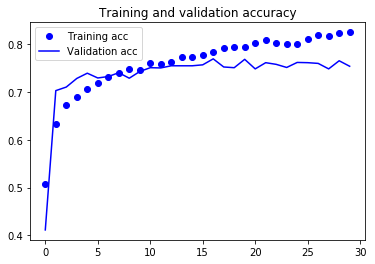

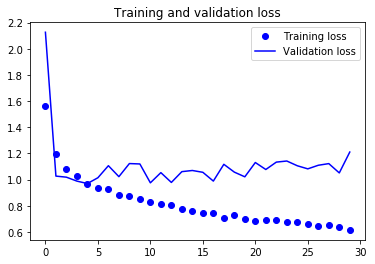

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_1(ResNet50_frozen).h5')

### {X} Model #1 (ResNet50 frozen)

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#freezeing (without fine tuning of layer freezing)
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_22[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/30
750/750 [==============================] - 1008s 1s/step - loss: 1.5606 - acc: 0.5085 - val_loss: 2.1263 - val_acc: 0.4115
Epoch 2/30
750/750 [==============================] - 973s 1s/step - loss: 1.1945 - acc: 0.6333 - val_loss: 1.0267 - val_acc: 0.7030
Epoch 3/30
750/750 [==============================] - 971s 1s/step - loss: 1.0838 - acc: 0.6728 - val_loss: 1.0185 - val_acc: 0.7105
Epoch 4/30
750/750 [==============================] - 952s 1s/step - loss: 1.0257 - acc: 0.6901 - val_loss: 0.9884 - val_acc: 0.7285
Epoch 5/30
750/750 [==============================] - 983s 1s/step - loss: 0.9694 - acc: 0.7061 - val_loss: 0.9699 - val_acc: 0.7395
Epoch 6/30
750/750 [==============================] - 950s 1s/step - loss: 0.9358 - acc: 0.7185 - val_loss: 1.0141 - val_acc: 0.7295
Epoch 7/30
750/750 [==============================] - 948s 1s/step - loss: 0.9249 - acc: 0.7312 - val_loss: 1.1062 

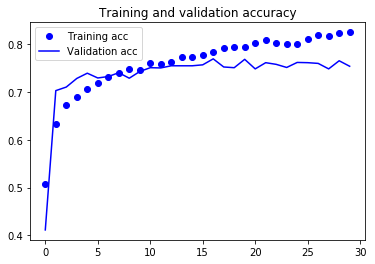

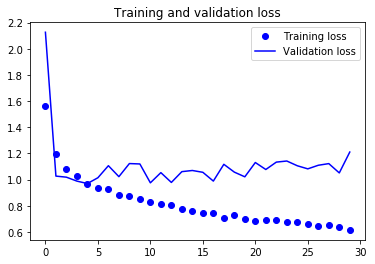

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_1(ResNet50_frozen).h5')

### {X} Model #1 (ResNet50 frozen) RE RUN (completed re run)

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#freezeing (without fine tuning of layer freezing)
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

94773248/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 104s 139ms/step - loss: 2.2657 - acc: 0.1548 - val_loss: 2.2029 - val_acc: 0.1905
Epoch 2/30
750/750 [==============================] - 101s 135ms/step - loss: 2.2076 - acc: 0.1841 - val_loss: 2.1251 - val_acc: 0.2325
Epoch 3/30
750/750 [==============================] - 101s 135ms/step - loss: 2.1662 - acc: 0.2141 - val_loss: 2.1485 - val_acc: 0.2575
Epoch 4/30
750/750 [==============================] - 100s 134ms/step - loss: 2.1468 - acc: 0.2165 - val_loss: 2.0839 - val_acc: 0.2610
Epoch 5/30
750/750 [==============================] - 100s 133ms/step - loss: 2.1261 - acc: 0.2260 - val_loss: 2.0697 - val_acc: 0.2610
Epoch 6/30
750/750 [==============================] - 100s 134ms/step - loss: 2.1126 - acc: 0.2355 - val_loss: 2.0931 - val_acc: 0.2575
Epoch 7/30
750/750 [==

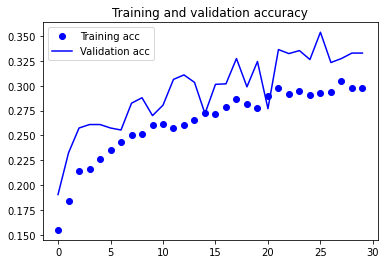

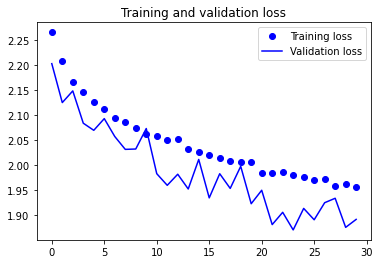

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### ResNet50 (UNfrozen) [Model1 re-run]



In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=45,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/45
750/750 [==============================] - 90s 121ms/step - loss: 1.1329 - acc: 0.6605 - val_loss: 0.9358 - val_acc: 0.7470
Epoch 2/45
750/750 [==============================] - 90s 119ms/step - loss: 0.8981 - acc: 0.7252 - val_loss: 0.8960 - val_acc: 0.7800
Epoch 3/45
750/750 [==============================] - 90s 120ms/step - loss: 0.7805 - acc: 0.7661 - val_loss: 0.9686 - val_acc: 0.7880
Epoch 4/45
750/750 [==============================] - 90s 120ms/step - loss: 0.6860 - acc: 0.7959 - val_loss: 0.9378 - val_acc: 0.8040
Epoch 5/45
750/750 [==============================] - 90s 120ms/step - loss: 0.6163 - acc: 0.8200 - val_loss: 1.3791 - val_acc: 0.7900
Epoch 6/45
750/750 [==============================] - 89s 119ms/step - loss: 0.5828 - acc: 0.8280 - val_loss: 1.4026 - val_acc: 0.7730
Epoch 7/45
750/750 [==============================] - 90s 120ms/step - loss: 0.5571 - acc: 0.8423 - val_

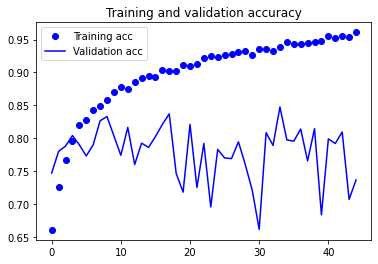

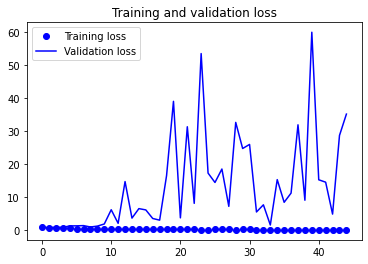

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.7319999933242798


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen).h5')
model.save('food_model_1(ResNet50_unfrozen)backup.h5')

### above EXPERIMENTAL



In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
750/750 [==============================] - 95s 127ms/step - loss: 1.9154 - acc: 0.5564 - val_loss: 2.8622 - val_acc: 0.4295
Epoch 2/15
750/750 [==============================] - 95s 127ms/step - loss: 1.3571 - acc: 0.7067 - val_loss: 1.2864 - val_acc: 0.7685
Epoch 3/15
750/750 [==============================] - 96s 128ms/step - loss: 1.1635 - acc: 0.7591 - val_loss: 1.2583 - val_acc: 0.7830
Epoch 4/15
750/750 [==============================] - 96s 128ms/step - loss: 1.0587 - acc: 0.7823 - val_loss: 1.3003 - val_acc: 0.8025
Epoch 5/15
750/750 [==============================] - 96s 128ms/step - loss: 0.9616 - acc: 0.8085 - val_loss: 2.4160 - val_acc: 0.7670
Epoch 6/15
750/750 [==============================] - 97s 129ms/step - loss: 0.9209 - acc: 0.8191 - val_loss: 4.1120 - val_acc: 0.7485
Epoch 7/15
750/750 [========

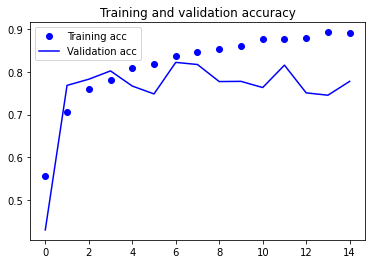

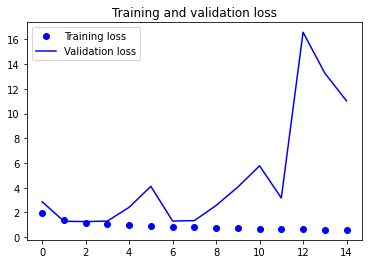

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.7720000147819519


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen_experimental).h5')
model.save('food_model_1(ResNet50_unfrozen_experimental)backup.h5')

### ResNet50 (frozen) + SGD 

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base14 = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#freezeing (without fine tuning of layer freezing)
conv_base14.trainable = False

model14 = models.Sequential()
model14.add(conv_base14) #ResNet50 pre-train
model14.add(layers.Flatten())
model14.add(layers.Dense(256, activation='relu'))
model14.add(layers.Dense(10, activation='softmax'))


conv_base14.summary()
model14.summary()

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\OldManSteve\AppData\Roaming\Python\Python37\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model14.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])

history14 = model14.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
750/750 [==============================] - 859s 1s/step - loss: 2.8278 - acc: 0.1632 - val_loss: 2.6848 - val_acc: 0.1625
Epoch 2/30
750/750 [==============================] - 850s 1s/step - loss: 2.2389 - acc: 0.2784 - val_loss: 1.9792 - val_acc: 0.3550
Epoch 3/30
750/750 [==============================] - 849s 1s/step - loss: 1.9791 - acc: 0.3461 - val_loss: 1.7445 - val_acc: 0.4300
Epoch 4/30
750/750 [==============================] - 848s 1s/step - loss: 1.7860 - acc: 0.4036 - val_loss: 1.5994 - val_acc: 0.4780
Epoch 5/30
750/750 [==============================] - 848s 1s/step - loss: 1.6753 - acc: 0.4383 - val_loss: 1.5021 - val_acc: 0.5085
Epoch 6/30
750/750 [==============================] - 863s 1s/step - loss: 1.6078 - acc: 0.4660 - val_loss: 1.4218 - val_acc: 0.5290
Epoch 7/30
750/750 [==============================] - 847s 1s/step -

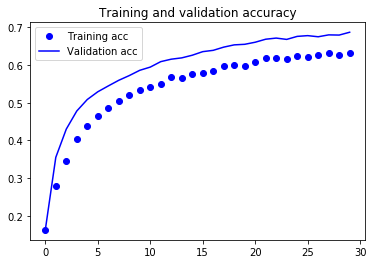

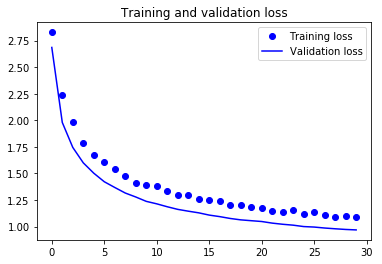

Found 500 images belonging to 10 classes.
test acc: 0.712


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc14 = history14.history['acc']
val_acc14 = history14.history['val_acc']
loss14 = history14.history['loss']
val_loss14 = history14.history['val_loss']

epochs14 = range(len(acc14))

plt.plot(epochs14, acc14, 'bo', label='Training acc')
plt.plot(epochs14, val_acc14, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs14, loss14, 'bo', label='Training loss')
plt.plot(epochs14, val_loss14, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model14.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model
model14.save('food_model_1(ResNet50_frozen+SGD).h5')

### ResNet50 (frozen) + SGD + >Epoch

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base15 = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#freezeing (without fine tuning of layer freezing)
conv_base15.trainable = False

model15 = models.Sequential()
model15.add(conv_base15) #ResNet50 pre-train
model15.add(layers.Flatten())
model15.add(layers.Dense(256, activation='relu'))
model15.add(layers.Dense(10, activation='softmax'))


conv_base15.summary()
model15.summary()

94773248/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model15.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])

history15 = model15.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=75,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/75
750/750 [==============================] - 854s 1s/step - loss: 2.8339 - acc: 0.1608 - val_loss: 2.4944 - val_acc: 0.1805
Epoch 2/75
750/750 [==============================] - 850s 1s/step - loss: 2.2254 - acc: 0.2792 - val_loss: 1.9776 - val_acc: 0.3540
Epoch 3/75
750/750 [==============================] - 846s 1s/step - loss: 1.9596 - acc: 0.3484 - val_loss: 1.7566 - val_acc: 0.4190
Epoch 4/75
750/750 [==============================] - 866s 1s/step - loss: 1.8154 - acc: 0.3955 - val_loss: 1.6114 - val_acc: 0.4590
Epoch 5/75
750/750 [==============================] - 877s 1s/step - loss: 1.6775 - acc: 0.4367 - val_loss: 1.5154 - val_acc: 0.4965
Epoch 6/75
750/750 [==============================] - 963s 1s/step - loss: 1.6105 - acc: 0.4633 - val_loss: 1.4282 - val_acc: 0.5265
Epoch 7/75
750/750 [==============================] - 967s 1s/step - loss: 1.5568 - acc: 0.4751 - val_loss: 1.3707 -

Epoch 38/75
750/750 [==============================] - 852s 1s/step - loss: 1.0235 - acc: 0.6552 - val_loss: 0.9438 - val_acc: 0.6960
Epoch 39/75
750/750 [==============================] - 851s 1s/step - loss: 1.0116 - acc: 0.6547 - val_loss: 0.9383 - val_acc: 0.6995
Epoch 40/75
750/750 [==============================] - 853s 1s/step - loss: 1.0073 - acc: 0.6593 - val_loss: 0.9356 - val_acc: 0.6970
Epoch 41/75
750/750 [==============================] - 860s 1s/step - loss: 1.0026 - acc: 0.6637 - val_loss: 0.9340 - val_acc: 0.7060
Epoch 42/75
750/750 [==============================] - 856s 1s/step - loss: 0.9951 - acc: 0.6693 - val_loss: 0.9281 - val_acc: 0.7035
Epoch 43/75
750/750 [==============================] - 854s 1s/step - loss: 1.0037 - acc: 0.6583 - val_loss: 0.9181 - val_acc: 0.7040
Epoch 44/75
750/750 [==============================] - 852s 1s/step - loss: 0.9850 - acc: 0.6688 - val_loss: 0.9172 - val_acc: 0.7020
Epoch 45/75
750/750 [==============================] - 857s 1s

750/750 [==============================] - 864s 1s/step - loss: 0.8838 - acc: 0.7003 - val_loss: 0.8415 - val_acc: 0.7305


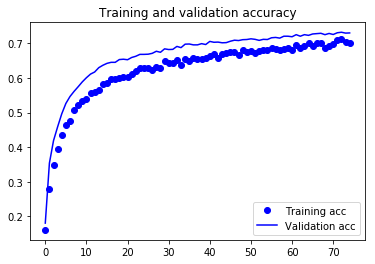

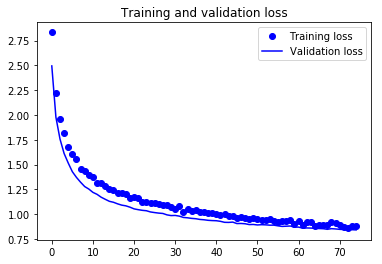

Found 500 images belonging to 10 classes.
test acc: 0.738


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc15 = history15.history['acc']
val_acc15 = history15.history['val_acc']
loss15 = history15.history['loss']
val_loss15 = history15.history['val_loss']

epochs15 = range(len(acc15))

plt.plot(epochs15, acc15, 'bo', label='Training acc')
plt.plot(epochs15, val_acc15, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs15, loss15, 'bo', label='Training loss')
plt.plot(epochs15, val_loss15, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model15.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model
model15.save('food_model_1(ResNet50_frozen+SGD)v2.h5')

In [ ]:
history15 = model15.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/15
750/750 [==============================] - 861s 1s/step - loss: 0.8587 - acc: 0.7099 - val_loss: 0.8364 - val_acc: 0.7300
Epoch 2/15
750/750 [==============================] - 862s 1s/step - loss: 0.8552 - acc: 0.7123 - val_loss: 0.8458 - val_acc: 0.7270
Epoch 3/15
750/750 [==============================] - 862s 1s/step - loss: 0.8749 - acc: 0.7032 - val_loss: 0.8374 - val_acc: 0.7300
Epoch 4/15
750/750 [==============================] - 865s 1s/step - loss: 0.8747 - acc: 0.7040 - val_loss: 0.8404 - val_acc: 0.7340
Epoch 5/15
750/750 [==============================] - 866s 1s/step - loss: 0.8711 - acc: 0.7028 - val_loss: 0.8365 - val_acc: 0.7325
Epoch 6/15
750/750 [==============================] - 865s 1s/step - loss: 0.8665 - acc: 0.7071 - val_loss: 0.8370 - val_acc: 0.7345
Epoch 7/15
750/750 [==============================] - 867s 1s/step - loss: 0.8475 - acc: 0.7124 - val_loss: 0.8352 - val_acc: 0.7350
Epoch 8/15
750/750 [==============================] - 866s 1s/step - 

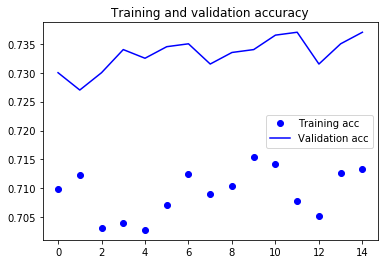

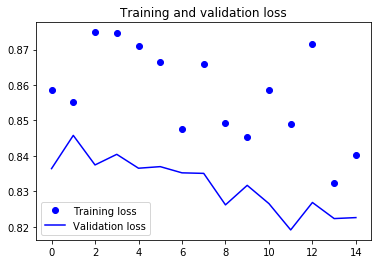

Found 500 images belonging to 10 classes.
test acc: 0.756


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc15 = history15.history['acc']
val_acc15 = history15.history['val_acc']
loss15 = history15.history['loss']
val_loss15 = history15.history['val_loss']

epochs15 = range(len(acc15))

plt.plot(epochs15, acc15, 'bo', label='Training acc')
plt.plot(epochs15, val_acc15, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs15, loss15, 'bo', label='Training loss')
plt.plot(epochs15, val_loss15, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model15.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model
model15.save('food_model_1(ResNet50_frozen+SGD)v2_1.h5')

In [ ]:
history15 = model15.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/15
750/750 [==============================] - 861s 1s/step - loss: 0.8259 - acc: 0.7176 - val_loss: 0.8165 - val_acc: 0.7340
Epoch 2/15
750/750 [==============================] - 864s 1s/step - loss: 0.8413 - acc: 0.7193 - val_loss: 0.8176 - val_acc: 0.7370
Epoch 3/15
750/750 [==============================] - 863s 1s/step - loss: 0.8316 - acc: 0.7160 - val_loss: 0.8150 - val_acc: 0.7405
Epoch 4/15
750/750 [==============================] - 867s 1s/step - loss: 0.7963 - acc: 0.7329 - val_loss: 0.8173 - val_acc: 0.7365
Epoch 5/15
750/750 [==============================] - 864s 1s/step - loss: 0.8253 - acc: 0.7232 - val_loss: 0.8165 - val_acc: 0.7360
Epoch 6/15
750/750 [==============================] - 866s 1s/step - loss: 0.8127 - acc: 0.7233 - val_loss: 0.8129 - val_acc: 0.7380
Epoch 7/15
750/750 [==============================] - 867s 1s/step - loss: 0.8264 - acc: 0.7229 - val_loss: 0.8185 - val_acc: 0.7375
Epoch 8/15
750/750 [==============================] - 874s 1s/step - 

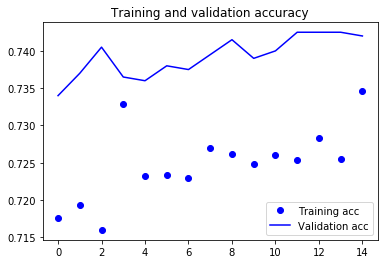

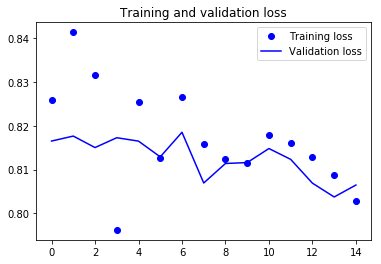

Found 500 images belonging to 10 classes.
test acc: 0.748


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc15 = history15.history['acc']
val_acc15 = history15.history['val_acc']
loss15 = history15.history['loss']
val_loss15 = history15.history['val_loss']

epochs15 = range(len(acc15))

plt.plot(epochs15, acc15, 'bo', label='Training acc')
plt.plot(epochs15, val_acc15, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs15, loss15, 'bo', label='Training loss')
plt.plot(epochs15, val_loss15, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model15.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model
model15.save('food_model_1(ResNet50_frozen+SGD)v2_2.h5')

In [ ]:
#BEST VER: 2_1

### ResNet50 (unfrozen) + SGD

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

94773248/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=45,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/45
750/750 [==============================] - 88s 117ms/step - loss: 2.7648 - acc: 0.1916 - val_loss: 2.5939 - val_acc: 0.1995
Epoch 2/45
750/750 [==============================] - 87s 116ms/step - loss: 2.1649 - acc: 0.3132 - val_loss: 1.8812 - val_acc: 0.4030
Epoch 3/45
750/750 [==============================] - 88s 117ms/step - loss: 1.8625 - acc: 0.3933 - val_loss: 1.6545 - val_acc: 0.4675
Epoch 4/45
750/750 [==============================] - 87s 116ms/step - loss: 1.6919 - acc: 0.4407 - val_loss: 1.4995 - val_acc: 0.5065
Epoch 5/45
750/750 [==============================] - 87s 117ms/step - loss: 1.5685 - acc: 0.4781 - val_loss: 1.3971 - val_acc: 0.5370
Epoch 6/45
750/750 [==============================] - 87s 116ms/step - loss: 1.4893 - acc: 0.5023 - val_loss: 1.3199 - val_acc: 0.5630
Epoch 7/45
750/750 [==============================] - 87s 117ms/step - loss: 1.4181 - acc: 0.5360 - val_

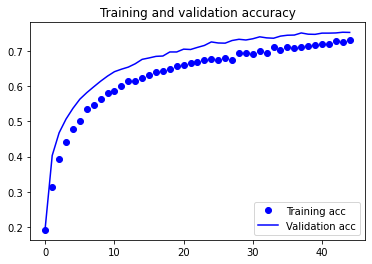

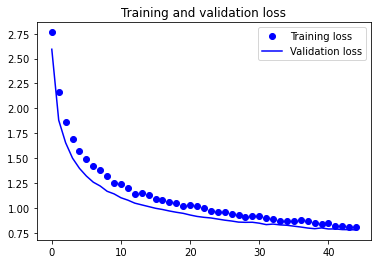

Found 500 images belonging to 10 classes.
test acc: 0.7599999904632568


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd).h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)backup.h5')

In [ ]:
#More epochs
history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/20
750/750 [==============================] - 87s 116ms/step - loss: 0.8100 - acc: 0.7296 - val_loss: 0.7813 - val_acc: 0.7535
Epoch 2/20
750/750 [==============================] - 87s 116ms/step - loss: 0.8114 - acc: 0.7285 - val_loss: 0.7631 - val_acc: 0.7585
Epoch 3/20
750/750 [==============================] - 88s 117ms/step - loss: 0.7963 - acc: 0.7361 - val_loss: 0.7676 - val_acc: 0.7570
Epoch 4/20
750/750 [==============================] - 88s 117ms/step - loss: 0.7901 - acc: 0.7356 - val_loss: 0.7597 - val_acc: 0.7615
Epoch 5/20
750/750 [==============================] - 87s 117ms/step - loss: 0.7781 - acc: 0.7365 - val_loss: 0.7549 - val_acc: 0.7620
Epoch 6/20
750/750 [==============================] - 88s 117ms/step - loss: 0.7826 - acc: 0.7379 - val_loss: 0.7605 - val_acc: 0.7650
Epoch 7/20
750/750 [==============================] - 87s 117ms/step - loss: 0.7719 - acc: 0.7376 - val_loss: 0.7490 - val_acc: 0.7655
Epoch 8/20
750/750 [==============================] - 8

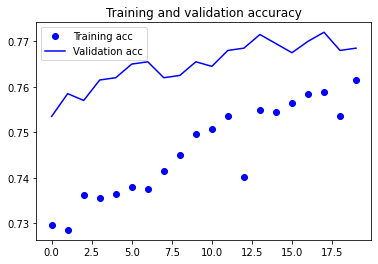

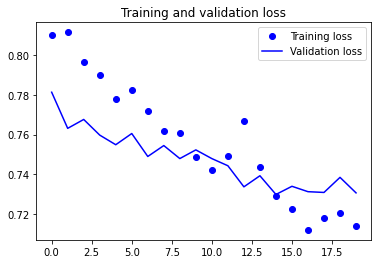

Found 500 images belonging to 10 classes.
test acc: 0.7760000228881836


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_1.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v1_1backup.h5')

In [ ]:
#More epochs
history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/20
750/750 [==============================] - 88s 117ms/step - loss: 0.7140 - acc: 0.7581 - val_loss: 0.7237 - val_acc: 0.7725
Epoch 2/20
750/750 [==============================] - 88s 117ms/step - loss: 0.6948 - acc: 0.7641 - val_loss: 0.7187 - val_acc: 0.7720
Epoch 3/20
750/750 [==============================] - 88s 118ms/step - loss: 0.7221 - acc: 0.7536 - val_loss: 0.7254 - val_acc: 0.7775
Epoch 4/20
750/750 [==============================] - 87s 117ms/step - loss: 0.6933 - acc: 0.7604 - val_loss: 0.7189 - val_acc: 0.7775
Epoch 5/20
750/750 [==============================] - 87s 116ms/step - loss: 0.6932 - acc: 0.7652 - val_loss: 0.7191 - val_acc: 0.7775
Epoch 6/20
750/750 [==============================] - 87s 116ms/step - loss: 0.6906 - acc: 0.7695 - val_loss: 0.7097 - val_acc: 0.7780
Epoch 7/20
750/750 [==============================] - 87s 116ms/step - loss: 0.6837 - acc: 0.7715 - val_loss: 0.7091 - val_acc: 0.7785
Epoch 8/20
750/750 [==============================] - 8

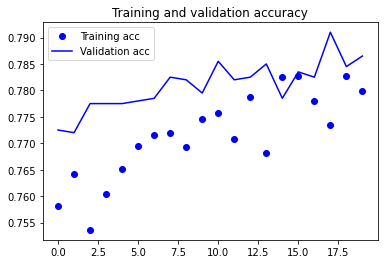

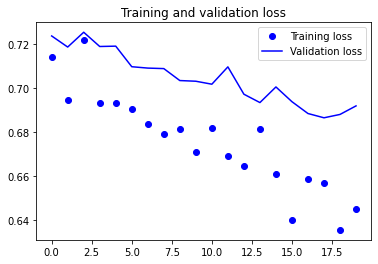

Found 500 images belonging to 10 classes.
test acc: 0.7979999780654907


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_2.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v1_2backup.h5')

In [ ]:
#More epochs
history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/20
750/750 [==============================] - 88s 117ms/step - loss: 0.6388 - acc: 0.7839 - val_loss: 0.6920 - val_acc: 0.7880
Epoch 2/20
750/750 [==============================] - 88s 117ms/step - loss: 0.6369 - acc: 0.7839 - val_loss: 0.6843 - val_acc: 0.7900
Epoch 3/20
750/750 [==============================] - 88s 118ms/step - loss: 0.6333 - acc: 0.7823 - val_loss: 0.6885 - val_acc: 0.7850
Epoch 4/20
750/750 [==============================] - 88s 117ms/step - loss: 0.6097 - acc: 0.7928 - val_loss: 0.6815 - val_acc: 0.7870
Epoch 5/20
750/750 [==============================] - 88s 117ms/step - loss: 0.6281 - acc: 0.7871 - val_loss: 0.6810 - val_acc: 0.7880
Epoch 6/20
750/750 [==============================] - 88s 117ms/step - loss: 0.6334 - acc: 0.7845 - val_loss: 0.6742 - val_acc: 0.7895
Epoch 7/20
750/750 [==============================] - 88s 117ms/step - loss: 0.6355 - acc: 0.7864 - val_loss: 0.6770 - val_acc: 0.7910
Epoch 8/20
750/750 [==============================] - 8

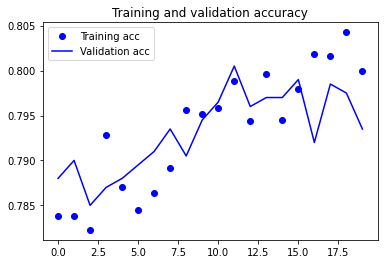

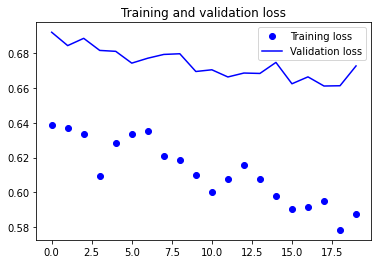

Found 500 images belonging to 10 classes.
test acc: 0.7979999780654907


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_3.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v1_3backup.h5')

In [ ]:
#More epochs
history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/20
750/750 [==============================] - 88s 117ms/step - loss: 0.5785 - acc: 0.8035 - val_loss: 0.6622 - val_acc: 0.8005
Epoch 2/20
750/750 [==============================] - 88s 118ms/step - loss: 0.5805 - acc: 0.8024 - val_loss: 0.6610 - val_acc: 0.8010
Epoch 3/20
750/750 [==============================] - 88s 118ms/step - loss: 0.5794 - acc: 0.8041 - val_loss: 0.6610 - val_acc: 0.8020
Epoch 4/20
750/750 [==============================] - 89s 118ms/step - loss: 0.5837 - acc: 0.7996 - val_loss: 0.6506 - val_acc: 0.8055
Epoch 5/20
750/750 [==============================] - 88s 118ms/step - loss: 0.5841 - acc: 0.8060 - val_loss: 0.6568 - val_acc: 0.7995
Epoch 6/20
750/750 [==============================] - 88s 118ms/step - loss: 0.5829 - acc: 0.8060 - val_loss: 0.6676 - val_acc: 0.8000
Epoch 7/20
750/750 [==============================] - 88s 118ms/step - loss: 0.5683 - acc: 0.8089 - val_loss: 0.6549 - val_acc: 0.8030
Epoch 8/20
750/750 [==============================] - 8

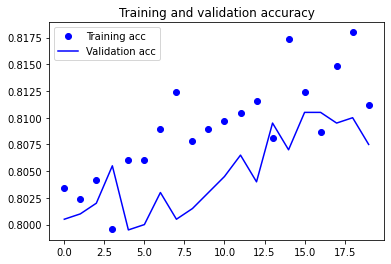

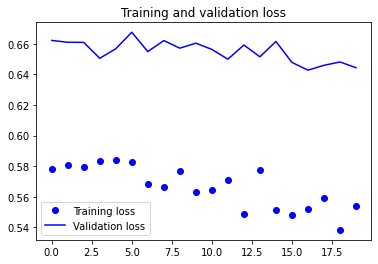

Found 500 images belonging to 10 classes.
test acc: 0.8119999766349792


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_4.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v1_4backup.h5')

In [ ]:
#More epochs (125+25)
model = models.load_model(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_4.h5')
model.summary()



#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])




history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 36,697,738
Trainable params: 36,644,618
Non-trainable params: 53,120
_________________________________________________________________
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
750/750 [==============================] - 90s 120ms/step - lo

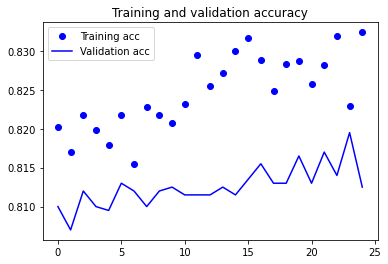

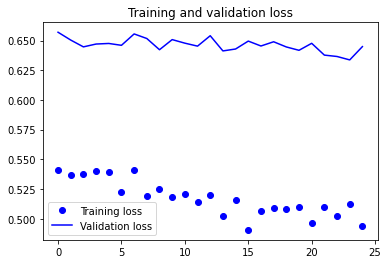

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8140000104904175


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_5.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v1_5backup.h5')

In [ ]:
#More epochs (150+25)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/25
750/750 [==============================] - 93s 124ms/step - loss: 0.5187 - acc: 0.8271 - val_loss: 0.6436 - val_acc: 0.8150
Epoch 2/25
750/750 [==============================] - 94s 125ms/step - loss: 0.5086 - acc: 0.8255 - val_loss: 0.6408 - val_acc: 0.8135
Epoch 3/25
750/750 [==============================] - 93s 125ms/step - loss: 0.4907 - acc: 0.8331 - val_loss: 0.6325 - val_acc: 0.8165
Epoch 4/25
750/750 [==============================] - 93s 124ms/step - loss: 0.4866 - acc: 0.8361 - val_loss: 0.6338 - val_acc: 0.8165
Epoch 5/25
750/750 [==============================] - 93s 125ms/step - loss: 0.4903 - acc: 0.8307 - val_loss: 0.6316 - val_acc: 0.8205
Epoch 6/25
750/750 [==============================] - 93s 124ms/step - loss: 0.4870 - acc: 0.8377 - val_loss: 0.6295 - val_acc: 0.8165
Epoch 7/25
750/750 [==============================] - 93s 124ms/step - loss: 0.4952 - acc: 0.8329 - val_loss: 0.6333 - val_acc: 0.8160
Epoch 8/25
750/750 [==============================] - 9

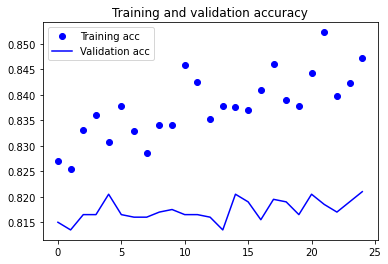

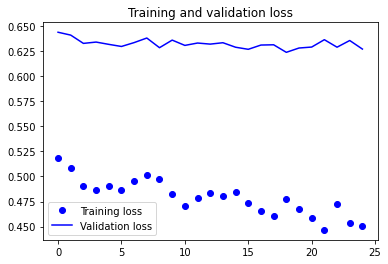

Found 500 images belonging to 10 classes.
test acc: 0.8220000267028809


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_6.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v1_6backup.h5')

In [ ]:
#More epochs (175+25)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/25
750/750 [==============================] - 92s 122ms/step - loss: 0.4421 - acc: 0.8489 - val_loss: 0.6297 - val_acc: 0.8205
Epoch 2/25
750/750 [==============================] - 93s 125ms/step - loss: 0.4627 - acc: 0.8401 - val_loss: 0.6341 - val_acc: 0.8195
Epoch 3/25
750/750 [==============================] - 94s 125ms/step - loss: 0.4522 - acc: 0.8481 - val_loss: 0.6286 - val_acc: 0.8220
Epoch 4/25
750/750 [==============================] - 92s 123ms/step - loss: 0.4484 - acc: 0.8476 - val_loss: 0.6389 - val_acc: 0.8190
Epoch 5/25
750/750 [==============================] - 92s 122ms/step - loss: 0.4634 - acc: 0.8467 - val_loss: 0.6283 - val_acc: 0.8170
Epoch 6/25
750/750 [==============================] - 92s 123ms/step - loss: 0.4456 - acc: 0.8451 - val_loss: 0.6337 - val_acc: 0.8180
Epoch 7/25
750/750 [==============================] - 93s 123ms/step - loss: 0.4546 - acc: 0.8468 - val_loss: 0.6223 - val_acc: 0.8230
Epoch 8/25
750/750 [==============================] - 9

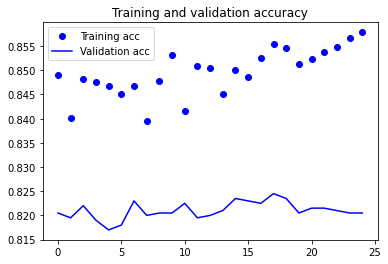

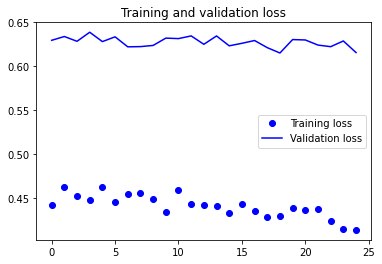

Found 500 images belonging to 10 classes.
test acc: 0.8199999928474426


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_7.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v1_7backup.h5')

In [ ]:
#More epochs (200+25)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/25
750/750 [==============================] - 92s 123ms/step - loss: 0.4180 - acc: 0.8600 - val_loss: 0.6251 - val_acc: 0.8250
Epoch 2/25
750/750 [==============================] - 91s 122ms/step - loss: 0.4333 - acc: 0.8515 - val_loss: 0.6231 - val_acc: 0.8215
Epoch 3/25
750/750 [==============================] - 87s 117ms/step - loss: 0.4201 - acc: 0.8581 - val_loss: 0.6327 - val_acc: 0.8190
Epoch 4/25
750/750 [==============================] - 89s 119ms/step - loss: 0.4094 - acc: 0.8591 - val_loss: 0.6345 - val_acc: 0.8200
Epoch 5/25
750/750 [==============================] - 91s 122ms/step - loss: 0.4163 - acc: 0.8547 - val_loss: 0.6278 - val_acc: 0.8200
Epoch 6/25
750/750 [==============================] - 91s 122ms/step - loss: 0.4129 - acc: 0.8596 - val_loss: 0.6238 - val_acc: 0.8230
Epoch 7/25
750/750 [==============================] - 92s 122ms/step - loss: 0.4135 - acc: 0.8592 - val_loss: 0.6251 - val_acc: 0.8270
Epoch 8/25
750/750 [==============================] - 9

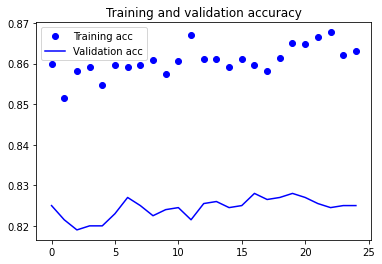

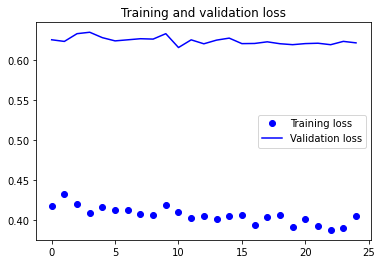

Found 500 images belonging to 10 classes.
test acc: 0.8119999766349792


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_8.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v1_8backup.h5')

In [ ]:
#More epochs (225+25)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/25
750/750 [==============================] - 97s 130ms/step - loss: 0.3819 - acc: 0.8683 - val_loss: 0.6190 - val_acc: 0.8255
Epoch 2/25
750/750 [==============================] - 97s 130ms/step - loss: 0.3722 - acc: 0.8731 - val_loss: 0.6163 - val_acc: 0.8265
Epoch 3/25
750/750 [==============================] - 97s 130ms/step - loss: 0.4094 - acc: 0.8595 - val_loss: 0.6235 - val_acc: 0.8265
Epoch 4/25
750/750 [==============================] - 98s 130ms/step - loss: 0.3907 - acc: 0.8689 - val_loss: 0.6213 - val_acc: 0.8265
Epoch 5/25
750/750 [==============================] - 98s 130ms/step - loss: 0.3882 - acc: 0.8717 - val_loss: 0.6167 - val_acc: 0.8295
Epoch 6/25
750/750 [==============================] - 98s 130ms/step - loss: 0.3973 - acc: 0.8663 - val_loss: 0.6191 - val_acc: 0.8255
Epoch 7/25
750/750 [==============================] - 98s 131ms/step - loss: 0.3828 - acc: 0.8708 - val_loss: 0.6295 - val_acc: 0.8235
Epoch 8/25
750/750 [==============================] - 9

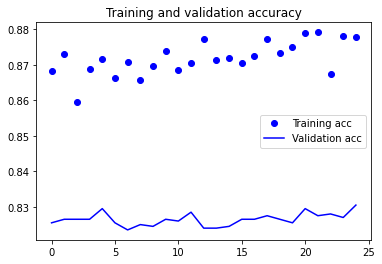

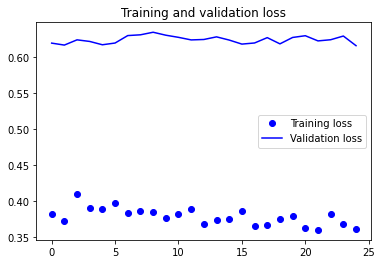

Found 500 images belonging to 10 classes.
test acc: 0.8140000104904175


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_9.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v1_9backup.h5')

In [ ]:
#More epochs (250+25)
model = models.load_model(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_4.h5')
model.summary()



#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])




history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 36,697,738
Trainable params: 36,644,618
Non-trainable params: 53,120
_________________________________________________________________
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
750/750 [==============================] - 85s 114ms/step - lo

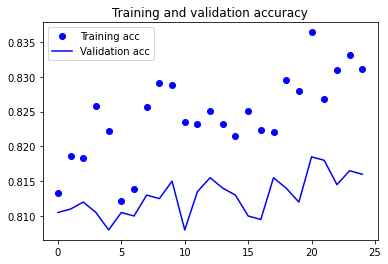

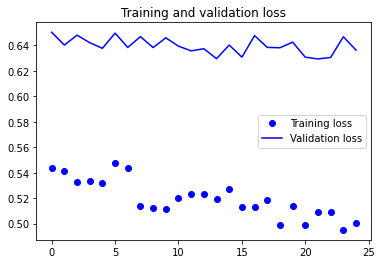

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8080000281333923


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_10.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v1_10backup.h5')

In [ ]:
#More epoch (275+25)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/25
750/750 [==============================] - 83s 111ms/step - loss: 0.4906 - acc: 0.8313 - val_loss: 0.6389 - val_acc: 0.8105
Epoch 2/25
750/750 [==============================] - 83s 110ms/step - loss: 0.4942 - acc: 0.8293 - val_loss: 0.6339 - val_acc: 0.8140
Epoch 3/25
750/750 [==============================] - 83s 110ms/step - loss: 0.4955 - acc: 0.8300 - val_loss: 0.6288 - val_acc: 0.8140
Epoch 4/25
750/750 [==============================] - 83s 110ms/step - loss: 0.4930 - acc: 0.8347 - val_loss: 0.6416 - val_acc: 0.8140
Epoch 5/25
750/750 [==============================] - 83s 110ms/step - loss: 0.4919 - acc: 0.8313 - val_loss: 0.6338 - val_acc: 0.8150
Epoch 6/25
750/750 [==============================] - 83s 110ms/step - loss: 0.4933 - acc: 0.8339 - val_loss: 0.6355 - val_acc: 0.8135
Epoch 7/25
750/750 [==============================] - 83s 110ms/step - loss: 0.4814 - acc: 0.8341 - val_loss: 0.6364 - val_acc: 0.8150
Epoch 8/25
750/750 [==============================] - 8

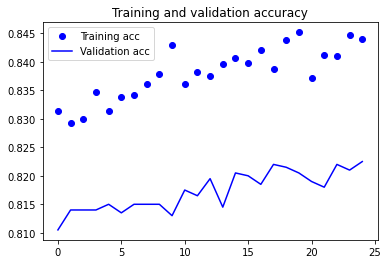

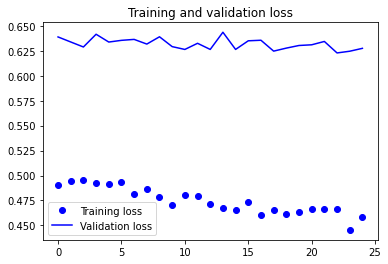

Found 500 images belonging to 10 classes.
test acc: 0.8159999847412109


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v1_11.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v1_11backup.h5')

In [ ]:
# BEST VER: v1_6

### ResNet50 (unfrozen) + SGD + Dense512 [v2]

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/200
750/750 [==============================] - 85s 114ms/step - loss: 2.4894 - acc: 0.1365 - val_loss: 2.3909 - val_acc: 0.1380
Epoch 2/200
750/750 [==============================] - 85s 113ms/step - loss: 2.2290 - acc: 0.2152 - val_loss: 2.0211 - val_acc: 0.2980
Epoch 3/200
750/750 [==============================] - 85s 113ms/step - loss: 2.0210 - acc: 0.2903 - val_loss: 1.8383 - val_acc: 0.3745
Epoch 4/200
750/750 [==============================] - 84s 112ms/step - loss: 1.8939 - acc: 0.3475 - val_loss: 1.6858 - val_acc: 0.4365
Epoch 5/200
750/750 [==============================] - 84s 111ms/step - loss: 1.7738 - acc: 0.3939 - val_loss: 1.5649 - val_acc: 0.4730
Epoch 6/200
750/750 [==============================] - 84s 112ms/step - loss: 1.6504 - acc: 0.4356 - val_loss: 1.4628 - val_acc: 0.5035
Epoch 7/200
750/750 [==============================] - 84s 112ms/step - loss: 1.5609 - acc: 0.4739

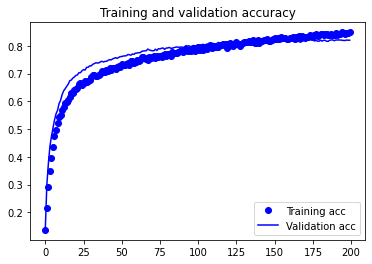

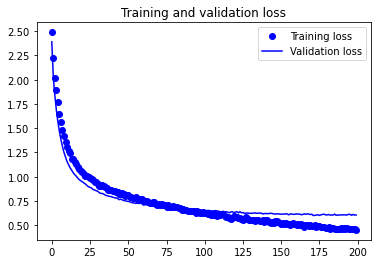

Found 500 images belonging to 10 classes.
test acc: 0.8339999914169312


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v2.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v2backup.h5')

### ResNet50 (unfrozen) + SGD + Dense512 [v2] + regularizers

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

94773248/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
750/750 [==============================] - 104s 138ms/step - loss: 2.9631 - acc: 0.1093 - val_loss: 2.5039 - val_acc: 0.1290
Epoch 2/200
750/750 [==============================] - 103s 137ms/step - loss: 2.5986 - acc: 0.1565 - val_loss: 2.1923 - val_acc: 0.2565
Epoch 3/200
750/750 [==============================] - 103s 137ms/step - loss: 2.4550 - acc: 0.1895 - val_loss: 2.0548 - val_acc: 0.3230
Epoch 4/200
750/750 [==============================] - 103s 137ms/step - loss: 2.3269 - acc: 0.2192 - val_loss: 1.9432 - val_acc: 0.3690
Epoch 5/200
750/750 [==============================] - 103s 137ms/step - loss: 2.2312 - acc: 0.2524 - val_loss: 1.8457 - val_acc: 0.4145
Epoch 6/200
750/750 [==============================] - 103s 137ms/step - loss: 2.1317 - acc: 0.2919 - val_loss: 1.7594 - val_acc: 0.4480
Epoch 7/200
750/

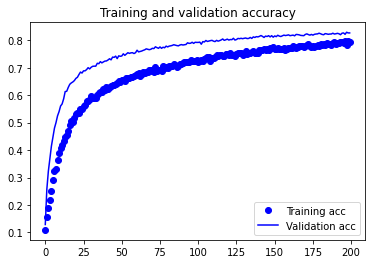

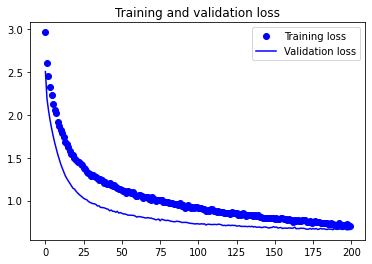

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8479999899864197


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v2_regularizers.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_backup.h5')

In [ ]:
#More Epochs (200+50)
#re-load model
model = models.load_model(model_path+'food_model_1(ResNet50_unfrozen+sgd)v2_regularizers.h5')
model.summary()


# Train the Model
#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

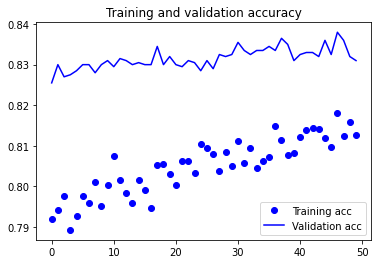

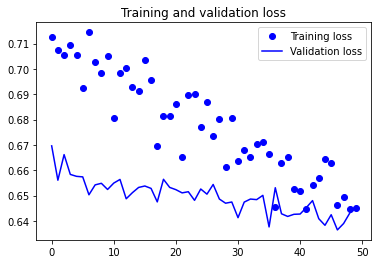

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8579999804496765


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_+50.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_+50backup.h5')

In [ ]:
#More Epochs (250+25)
model = models.load_model(model_path+'food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_+50.h5')
model.summary()


# Train the Model
#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

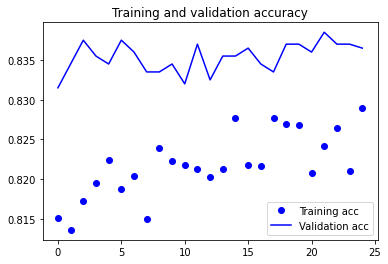

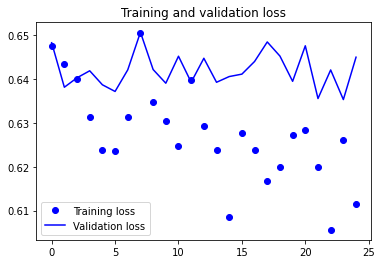

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8519999980926514


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_+50+25.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_+50+25backup.h5')

In [ ]:
#BEST VER: +50

### EXPERIMENTAL: Re-run above with 100e + lr=0.001

In [4]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

94773248/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [5]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
750/750 [==============================] - 85s 114ms/step - loss: 1.7227 - acc: 0.4449 - val_loss: 1.6695 - val_acc: 0.4775
Epoch 2/100
750/750 [==============================] - 88s 117ms/step - loss: 1.1590 - acc: 0.6456 - val_loss: 0.8084 - val_acc: 0.7500
Epoch 3/100
750/750 [==============================] - 88s 117ms/step - loss: 1.0167 - acc: 0.6932 - val_loss: 0.7018 - val_acc: 0.7895
Epoch 4/100
750/750 [==============================] - 85s 113ms/step - loss: 0.8883 - acc: 0.7409 - val_loss: 0.7054 - val_acc: 0.8020
Epoch 5/100
750/750 [==============================] - 83s 111ms/step - loss: 0.8491 - acc: 0.7548 - val_loss: 0.6473 - val_acc: 0.8140
Epoch 6/100
750/750 [==============================] - 83s 111ms/step - loss: 0.7820 - acc: 0.7800 - val_loss: 0.6476 - val_acc: 0.8175
Epoch 7/100
750/750 [=

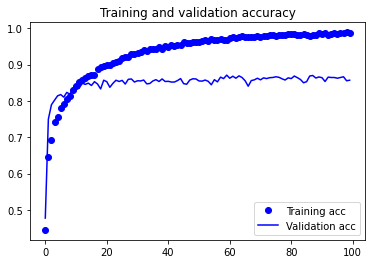

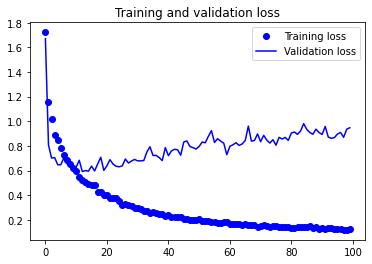

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8640000224113464


In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

### Re-run above with 100e + lr=8e-4

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=8e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
750/750 [==============================] - 85s 113ms/step - loss: 1.7839 - acc: 0.4215 - val_loss: 1.7186 - val_acc: 0.4565
Epoch 2/100
750/750 [==============================] - 84s 112ms/step - loss: 1.2252 - acc: 0.6259 - val_loss: 0.8458 - val_acc: 0.7380
Epoch 3/100
750/750 [==============================] - 84s 112ms/step - loss: 1.0514 - acc: 0.6773 - val_loss: 0.8056 - val_acc: 0.7680
Epoch 4/100
750/750 [==============================] - 84s 113ms/step - loss: 0.9727 - acc: 0.7100 - val_loss: 0.7417 - val_acc: 0.7940
Epoch 5/100
750/750 [==============================] - 84s 112ms/step - loss: 0.8804 - acc: 0.7361 - val_loss: 0.6976 - val_acc: 0.7980
Epoch 6/100
750/750 [==============================] - 83s 111ms/step - loss: 0.8086 - acc: 0.7683 - val_loss: 0.6956 - val_acc: 0.8040
Epoch 7/100
750/750 [=

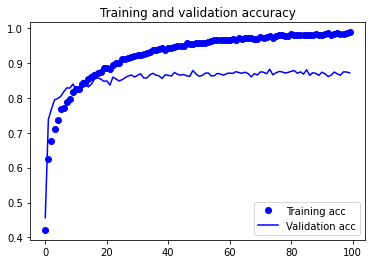

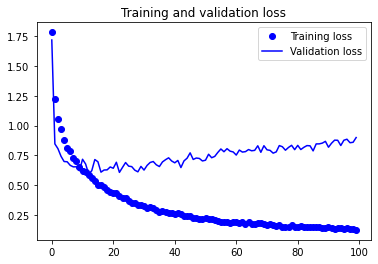

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8640000224113464


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_rerun.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_rerun_backup.h5')

### Re-run above (with 100e + lr=8e-4) +  higher regularizers0.001

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=8e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
750/750 [==============================] - 99s 132ms/step - loss: 2.5273 - acc: 0.4297 - val_loss: 2.6063 - val_acc: 0.4120
Epoch 2/100
750/750 [==============================] - 97s 130ms/step - loss: 1.9568 - acc: 0.6273 - val_loss: 1.6486 - val_acc: 0.7380
Epoch 3/100
750/750 [==============================] - 97s 130ms/step - loss: 1.8131 - acc: 0.6833 - val_loss: 1.5722 - val_acc: 0.7650
Epoch 4/100
750/750 [==============================] - 96s 128ms/step - loss: 1.7024 - acc: 0.7239 - val_loss: 1.5635 - val_acc: 0.7695
Epoch 5/100
750/750 [==============================] - 96s 128ms/step - loss: 1.6438 - acc: 0.7353 - val_loss: 1.4991 - val_acc: 0.7920
Epoch 6/100
750/750 [==============================] - 97s 130ms/step - loss: 1.5834 - acc: 0.7589 - val_loss: 1.4419 - val_acc: 0.8175
Epoch 7/100
750/750 [=

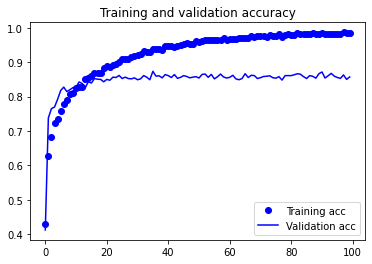

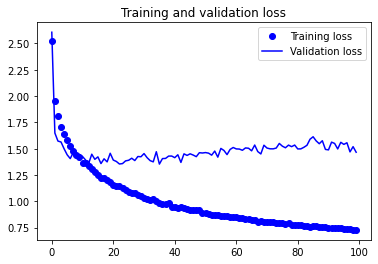

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8500000238418579


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_rerun1.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_rerun1_backup.h5')

### Re-run above (with [50]e + lr=8e-4) +  higher regularizers0.002 + Dropout 0.5

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=8e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/50
750/750 [==============================] - 101s 134ms/step - loss: 3.8878 - acc: 0.2693 - val_loss: 3.6594 - val_acc: 0.3390
Epoch 2/50
750/750 [==============================] - 98s 131ms/step - loss: 3.3181 - acc: 0.4440 - val_loss: 2.7219 - val_acc: 0.6690
Epoch 3/50
750/750 [==============================] - 99s 132ms/step - loss: 3.0738 - acc: 0.5435 - val_loss: 2.5613 - val_acc: 0.7255
Epoch 4/50
750/750 [==============================] - 97s 130ms/step - loss: 2.9063 - acc: 0.5995 - val_loss: 2.5000 - val_acc: 0.7650
Epoch 5/50
750/750 [==============================] - 96s 128ms/step - loss: 2.8077 - acc: 0.6343 - val_loss: 2.4357 - val_acc: 0.7635
Epoch 6/50
750/750 [==============================] - 96s 128ms/step - loss: 2.7025 - acc: 0.6795 - val_loss: 2.4182 - val_acc: 0.7735
Epoch 7/50
750/750 [==============================] - 98s 131ms/step - loss: 2.6394 - acc: 0.6979 - val

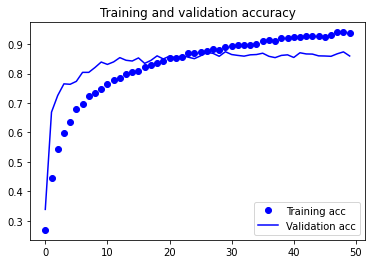

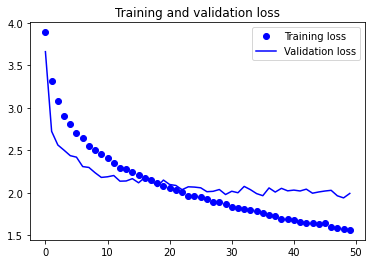

Found 500 images belonging to 10 classes.
test acc: 0.8579999804496765


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_rerun2.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_rerun2_backup.h5')

### Re-run above (with [50]e + lr=8e-4) +  higher regularizers0.002 + Dropout 0.5 [conv3_block1_1_conv]

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv3_block1_1_conv': 
        set_trainable = True # after layer, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=8e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/50
750/750 [==============================] - 98s 130ms/step - loss: 4.0728 - acc: 0.1317 - val_loss: 3.8699 - val_acc: 0.2625
Epoch 2/50
750/750 [==============================] - 97s 129ms/step - loss: 3.8832 - acc: 0.2015 - val_loss: 3.6548 - val_acc: 0.3435
Epoch 3/50
750/750 [==============================] - 97s 129ms/step - loss: 3.7168 - acc: 0.2833 - val_loss: 3.4433 - val_acc: 0.3925
Epoch 4/50
750/750 [==============================] - 96s 128ms/step - loss: 3.5774 - acc: 0.3444 - val_loss: 3.8667 - val_acc: 0.2520
Epoch 5/50
750/750 [==============================] - 96s 128ms/step - loss: 3.4359 - acc: 0.3975 - val_loss: 3.2064 - val_acc: 0.4905
Epoch 6/50
750/750 [==============================] - 96s 127ms/step - loss: 3.3705 - acc: 0.4264 - val_loss: 3.2317 - val_acc: 0.4645
Epoch 7/50
750/750 [==============================] - 96s 128ms/step - loss: 3.2569 - acc: 0.4619 - val_

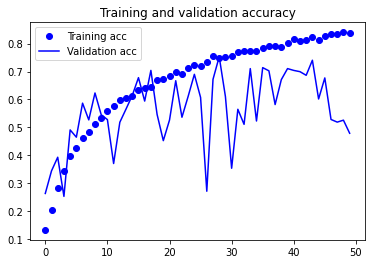

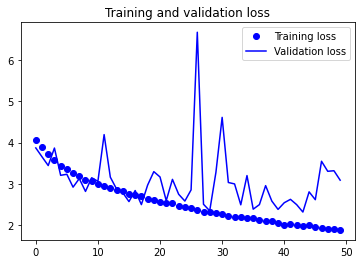

Found 500 images belonging to 10 classes.
test acc: 0.4779999852180481


In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_rerun3.h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)v2_regularizers_rerun3_backup.h5')

### {X} ResNet50 (unfrozen) + SGD + Dense512 [Fine-Tune Block]

In [ ]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfrozen
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv4_block1_1_conv':
        set_trainable = True # after layer, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False



model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/200
750/750 [==============================] - 80s 107ms/step - loss: 2.3606 - acc: 0.1285 - val_loss: 2.3271 - val_acc: 0.1445
Epoch 2/200
750/750 [==============================] - 80s 107ms/step - loss: 2.2749 - acc: 0.1608 - val_loss: 2.2628 - val_acc: 0.1885
Epoch 3/200
750/750 [==============================] - 80s 107ms/step - loss: 2.2160 - acc: 0.1899 - val_loss: 2.2086 - val_acc: 0.2025
Epoch 4/200
750/750 [==============================] - 80s 106ms/step - loss: 2.1960 - acc: 0.1948 - val_loss: 2.1595 - val_acc: 0.2110
Epoch 5/200
750/750 [==============================] - 80s 106ms/step - loss: 2.1527 - acc: 0.2176 - val_loss: 2.1265 - val_acc: 0.2395
Epoch 6/200
750/750 [==============================] - 80s 107ms/step - loss: 2.1437 - acc: 0.2229 - val_loss: 2.1001 - val_acc: 0.2540
Epoch 7/200
750/750 [==============================] - 80s 106ms/step - loss: 2.1252 - acc: 0.2247

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
# Save the Model to google drive
model.save(model_path+'food_model_1(ResNet50_unfrozen+sgd)(blk_4).h5')
model.save('food_model_1(ResNet50_unfrozen+sgd)(blk4)backup.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [ ]:
# Model #1
model.load_weights('food_model_1.h5')




In [ ]:
# Model #2
model.load_weights('food_model_2.h5')




In [ ]:
# Save the best model


model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [ ]:
# Load the model
model.load_weights('food_model_best.h5')

In [ ]:
# Load the food list (in alphabetical order)
with open('??.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

In [ ]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [ ]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '??.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)